In [163]:
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
#Prepocessing
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
 # training
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
 


# pd.set_option ('display.max_row',None)


In [164]:
data=pd.read_csv('Pokemon.csv')


In [165]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [167]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [168]:
data=data.drop(['#','Name','Type 2'],axis =1 )

In [169]:
data['Legendary']=data['Legendary'].astype(np.int)
data

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,0
1,Grass,405,60,62,63,80,80,60,1,0
2,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0
5,Fire,405,58,64,58,80,65,80,1,0
6,Fire,534,78,84,78,109,85,100,1,0
7,Fire,634,78,130,111,130,85,100,1,0
8,Fire,634,78,104,78,159,115,100,1,0
9,Water,314,44,48,65,50,64,43,1,0


# EDA

In [170]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [171]:
 numeric_column=data.drop(['Type 1'],axis=1).columns

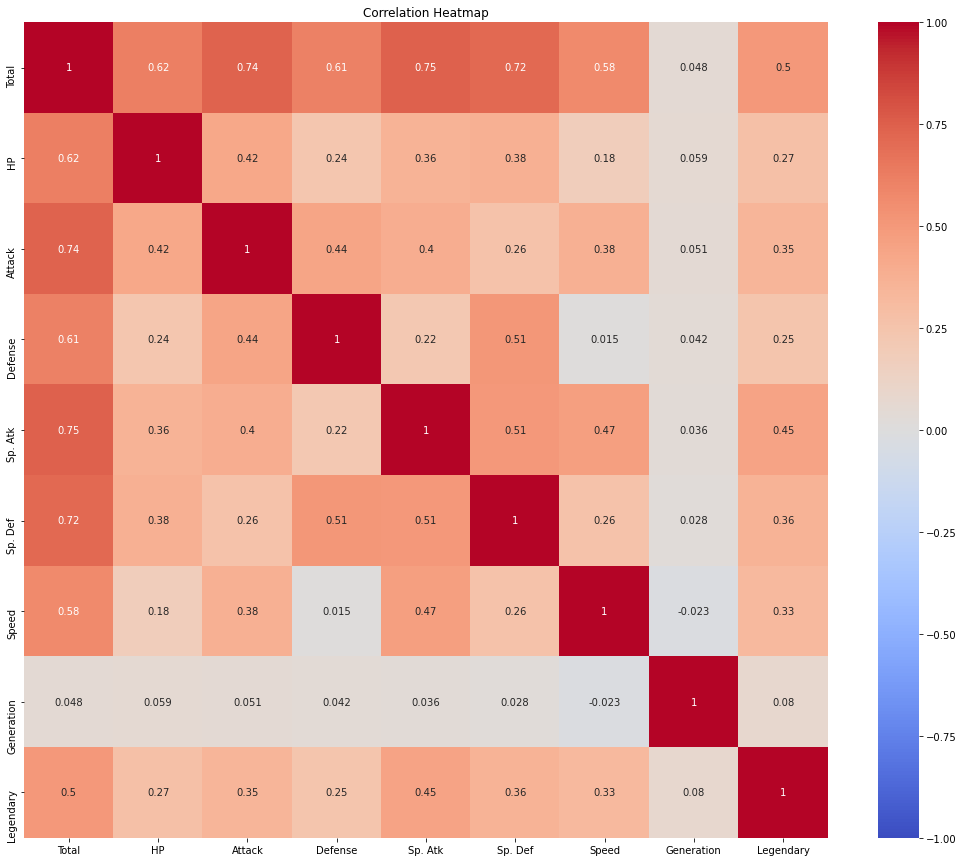

In [172]:
Correlation=data[numeric_column].corr()
plt.figure(figsize=(18,15))
sns.heatmap(Correlation,annot=True,vmin=-1,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

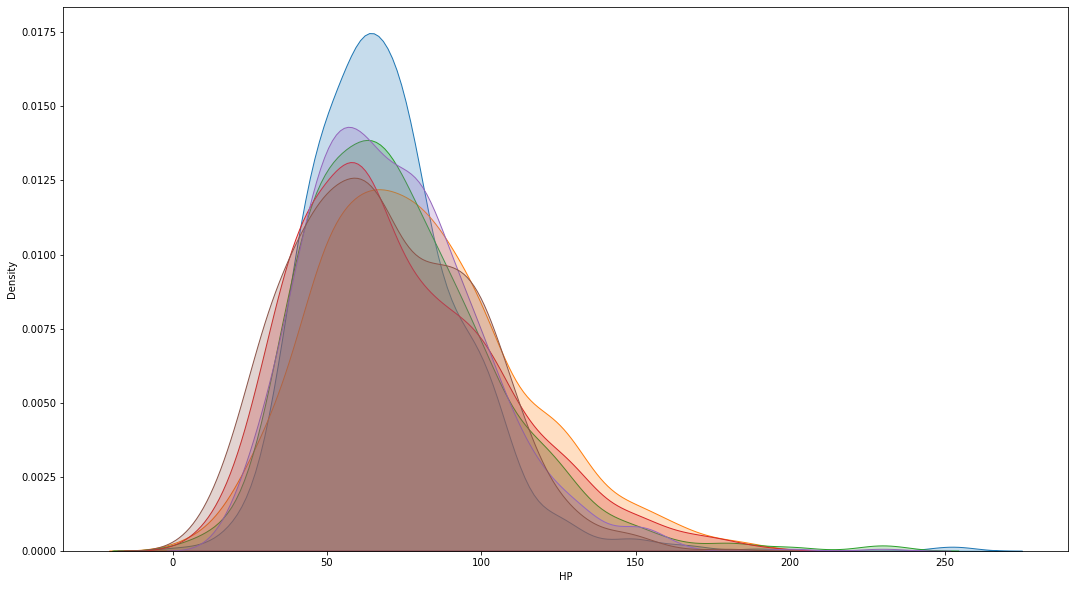

In [173]:
plt.figure(figsize=(18, 10))
for column in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    sns.kdeplot(data[column], shade=True) #kernal density estimate plot
plt.show()

# Preprocessing

In [174]:
def onehot_encode(df,column,prefix):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=prefix)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df 

In [175]:
data=onehot_encode(data,'Type 1','Ty')

In [176]:
data

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ty_Bug,Ty_Dark,Ty_Dragon,Ty_Electric,Ty_Fairy,Ty_Fighting,Ty_Fire,Ty_Flying,Ty_Ghost,Ty_Grass,Ty_Ground,Ty_Ice,Ty_Normal,Ty_Poison,Ty_Psychic,Ty_Rock,Ty_Steel,Ty_Water
0,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,405,58,64,58,80,65,80,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,534,78,84,78,109,85,100,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,634,78,130,111,130,85,100,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,634,78,104,78,159,115,100,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,314,44,48,65,50,64,43,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Splitting and Scaling

In [177]:
y=data['Legendary']
x=data.drop(['Legendary'],axis=1)

In [178]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

# Training

In [180]:
x.shape

(800, 26)

In [181]:
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train)

print("Neural Network Accuracy: {:.2f}%".format(nn_model.score(x_test, y_test) * 100))

Neural Network Accuracy: 95.42%


C:\Users\hritw\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [182]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
print("Support Vector Machine : {:.2f}%".format(svm_model.score(x_test,y_test)*100))

Support Vector Machine : 95.83%


In [183]:
#Xgboost 
classifier=xgb.XGBClassifier()
classifier.fit(x_train, y_train)
print("xgboost: {:.2f}%".format(classifier.score(x_test, y_test) * 100))

[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost: 96.67%


C:\Users\hritw\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Xgboost gives you the best prediction Percentage of 96.67%